# Bank Marketing Dataset Analysis

This notebook performs exploratory data analysis, data cleaning, and preprocessing on the Bank Marketing dataset.

**Objective:** Predict whether a client will subscribe to a term deposit (target variable 'y').

**Dataset:** UCI Bank Marketing Dataset (bank-full.csv)

### Import Libraries

In [37]:
# Data manipulation and analysis
import pandas as pd
from collections import Counter

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing and scaling
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# Handling imbalanced datasets
from imblearn.under_sampling import NearMiss

##  Data Loading

In [38]:
# Load the bank marketing dataset from Google Drive
# The dataset uses semicolon (;) as delimiter
bank = pd.read_csv('bank-full.csv', sep=';')

# Display first 5 rows to understand the data structure
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [39]:
# Check the total number of records in the dataset
len(bank)

45211

In [40]:
# Check the distribution of the target variable 'y'
# This reveals the class imbalance in the dataset
bank['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

## Exploratory Data Analysis (EDA)

### Dataset Information

In [41]:
# Display dataset information including column names, data types, and memory usage
# This helps understand the structure and identify numerical vs categorical features
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Check for Missing Values

In [42]:
# Check for missing values in each column
# Result: No missing values found in this dataset
# Note: 'unknown' values in categorical columns are not treated as missing
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### 3.3 Statistical Summary of Numerical Variables

In [43]:
# Generate descriptive statistics for numerical columns
# Transposed for better readability
# This reveals: mean, std, min, max, and quartile values
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


### Distribution of Numerical Variables

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

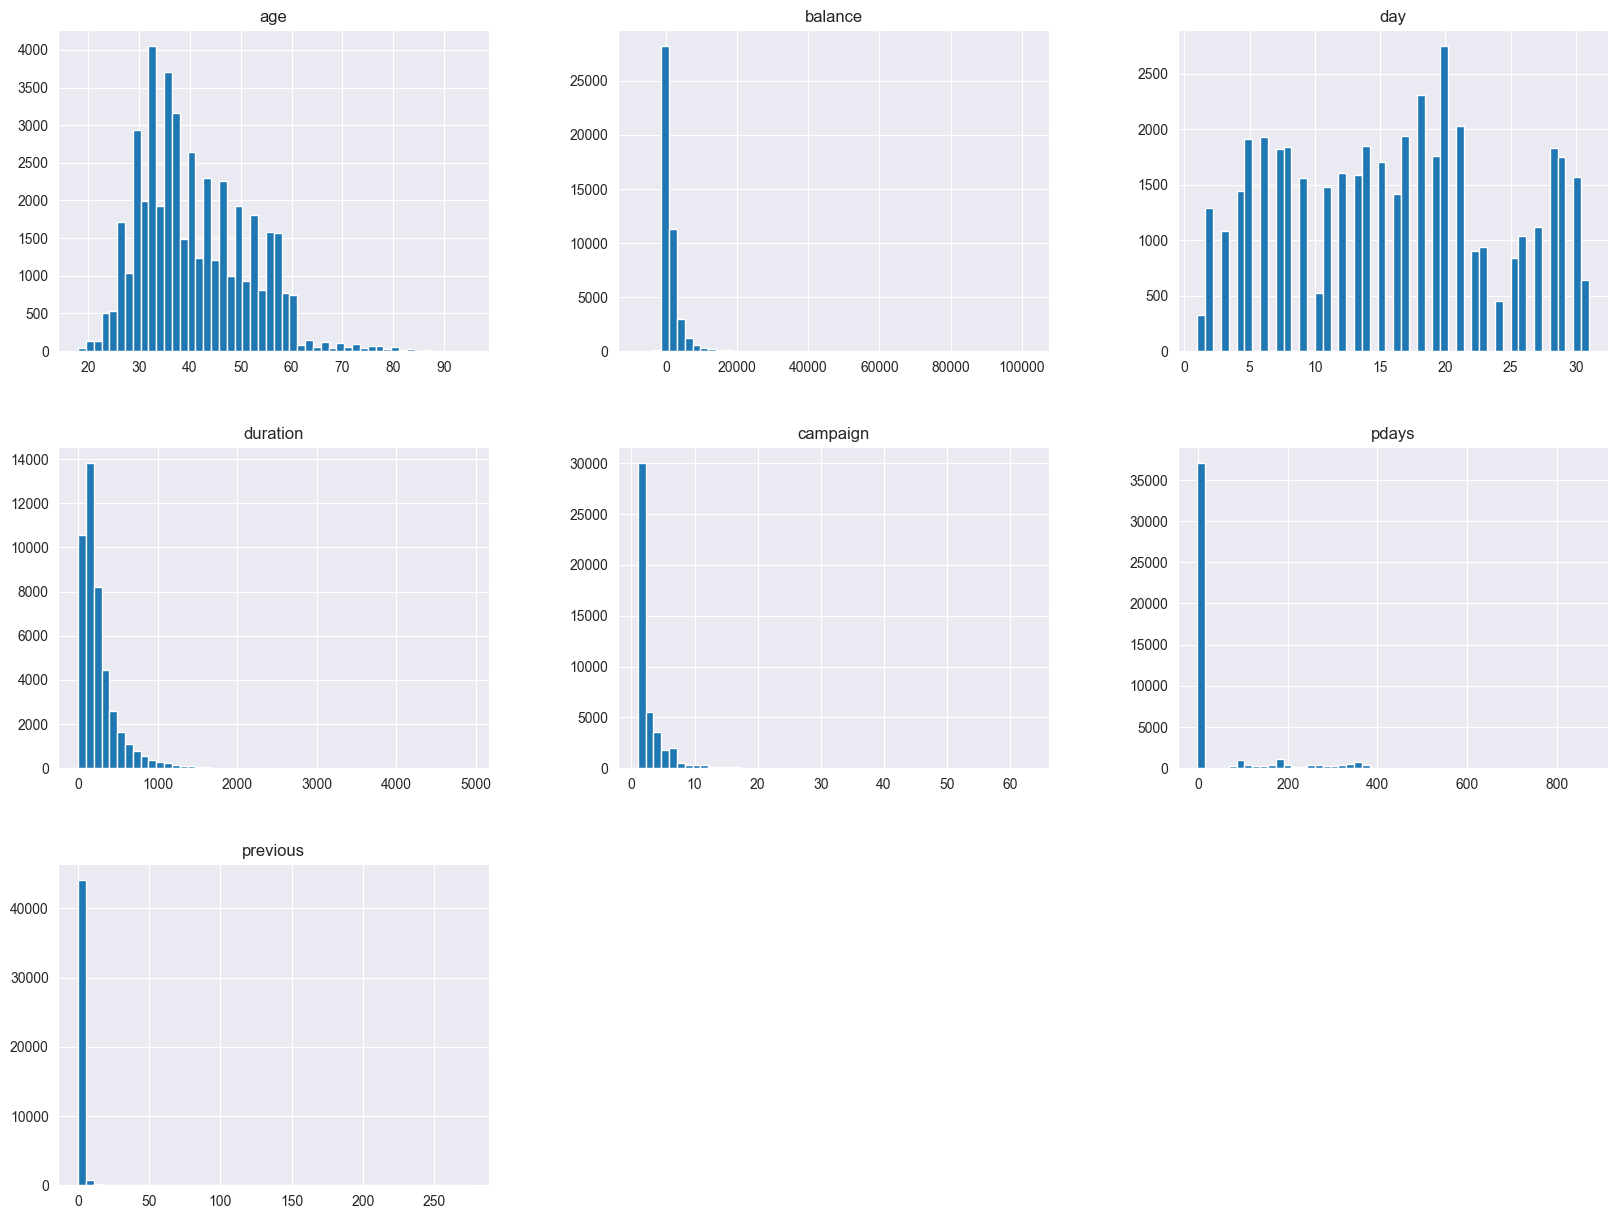

In [44]:
# Plot histograms for all numerical variables
# This helps identify the distribution shape, skewness, and potential outliers
bank.hist(bins=50, figsize=(20,15))

### Box Plots for Outlier Detection

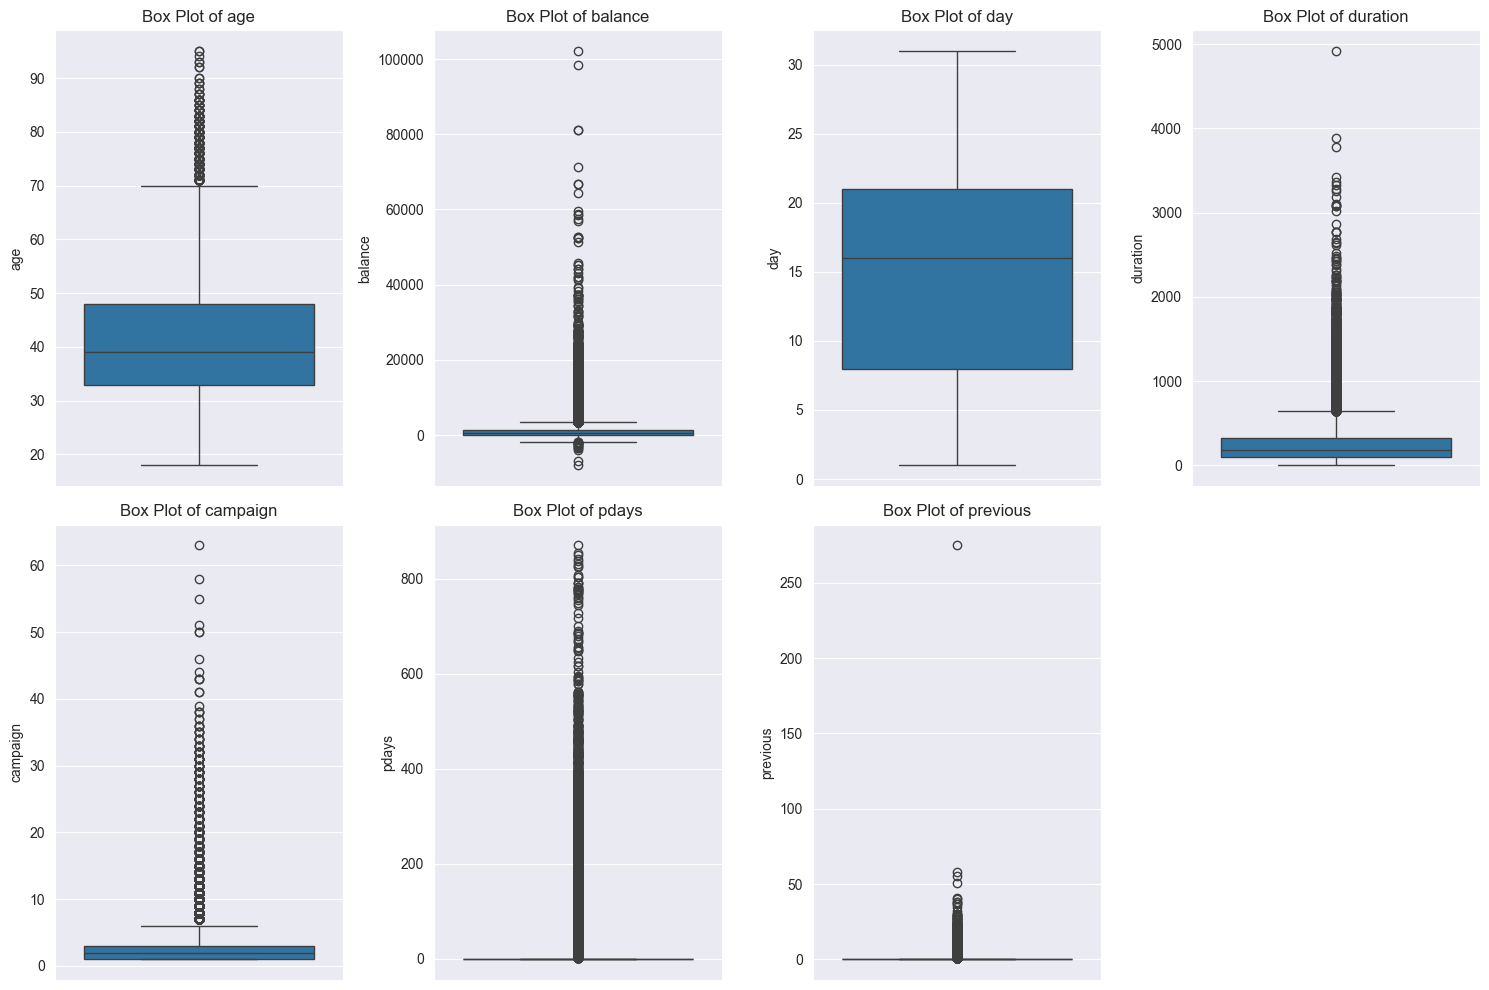

In [45]:
# Create box plots to visualize the spread and identify outliers in numerical columns
# Box plots show median, quartiles, and outliers beyond 1.5*IQR
numerical_cols = bank.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=bank[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

### Unique Values in Categorical Columns

In [46]:
# Display unique values for each categorical column
# This helps understand the categories and identify 'unknown' values
for col in bank.columns:
  if bank[col].dtype == 'object':
    print(f'{col}: {bank[col].unique()}')
    print()

job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

marital: ['married' 'single' 'divorced']

education: ['tertiary' 'secondary' 'unknown' 'primary']

default: ['no' 'yes']

housing: ['yes' 'no']

loan: ['no' 'yes']

contact: ['unknown' 'cellular' 'telephone']

month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

poutcome: ['unknown' 'failure' 'other' 'success']

y: ['no' 'yes']



## Data Cleaning and Preprocessing

### Normalize Numerical Columns

Apply StandardScaler to transform features to have mean=0 and std=1.
This is important for algorithms sensitive to feature scales.

In [47]:
# Apply StandardScaler to normalize selected numerical columns
# Columns normalized: balance, duration, pdays, previous
# StandardScaler transforms data to have mean=0 and standard deviation=1
scaler = StandardScaler()
bank[['balance', 'duration', 'pdays', 'previous']] = scaler.fit_transform(bank[['balance', 'duration', 'pdays', 'previous']])

# Verify the normalization by checking the new statistics
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,4.093621e+01,10.618762,18.000000,33.000000,39.000000,48.000000,95.000000
balance,45211.0,1.508750e-17,1.000011,-3.081149,-0.423772,-0.300280,0.021587,33.094776
day,45211.0,1.580642e+01,8.322476,1.000000,8.000000,16.000000,21.000000,31.000000
duration,45211.0,5.783542e-17,1.000011,-1.002478,-0.602517,-0.303517,0.236237,18.094700
campaign,45211.0,2.763841e+00,3.098021,1.000000,1.000000,2.000000,3.000000,63.000000
pdays,45211.0,0.000000e+00,1.000011,-0.411453,-0.411453,-0.411453,-0.411453,8.297431
previous,45211.0,0.000000e+00,1.000011,-0.251940,-0.251940,-0.251940,-0.251940,119.135982


### Data Distribution After Normalization

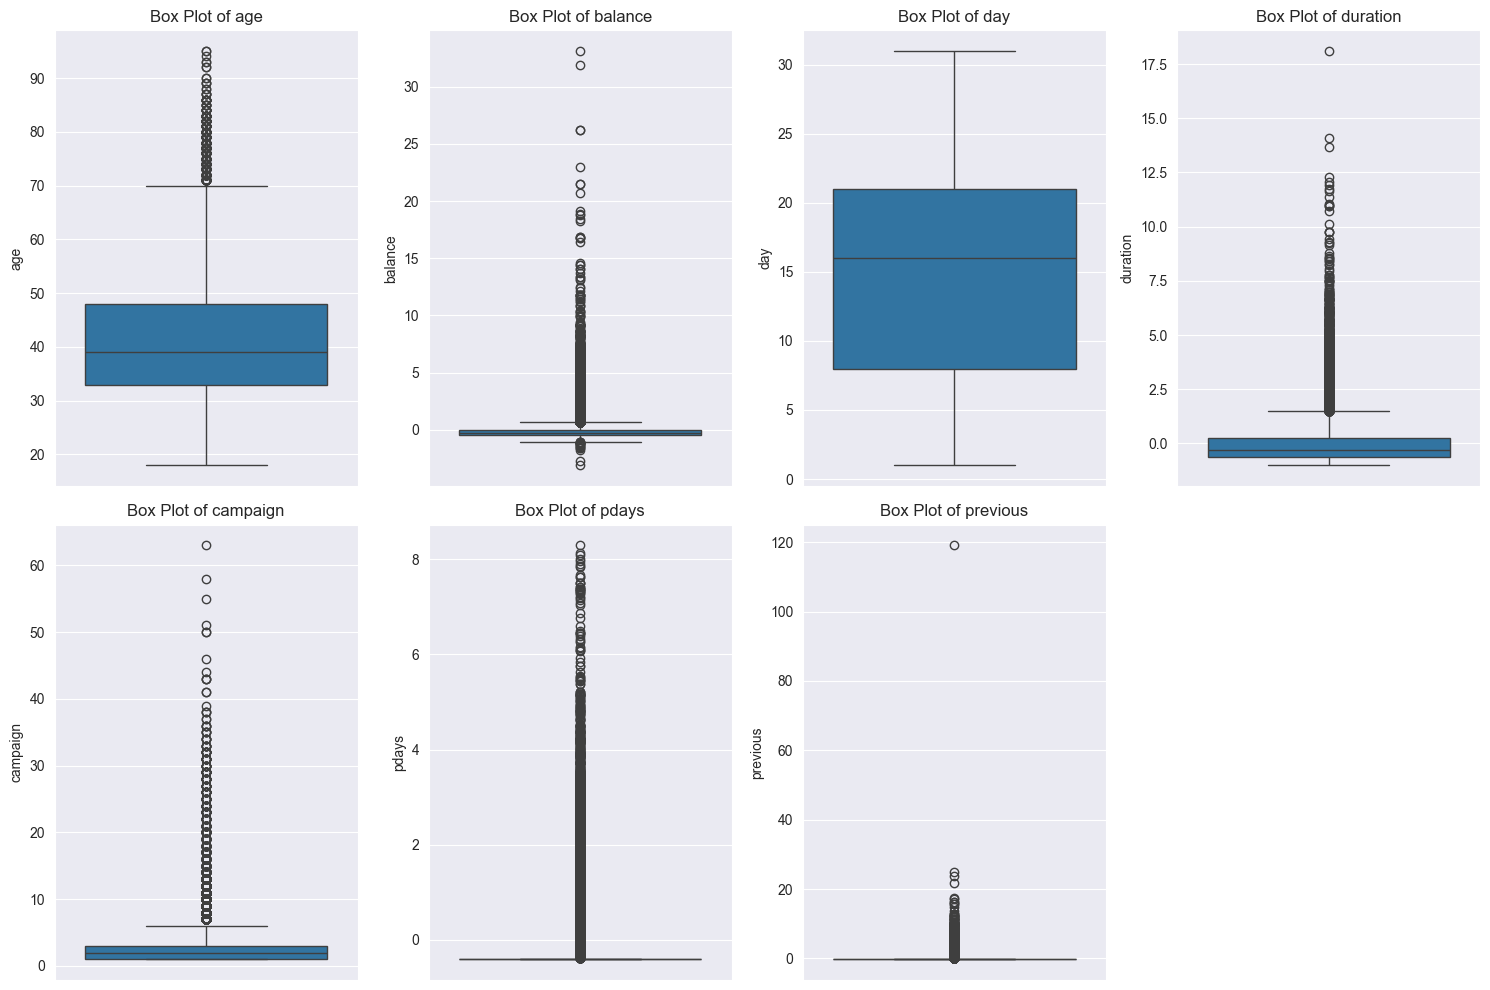

In [48]:
# Visualize box plots after normalization to compare with original distributions
numerical_cols = bank.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=bank[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

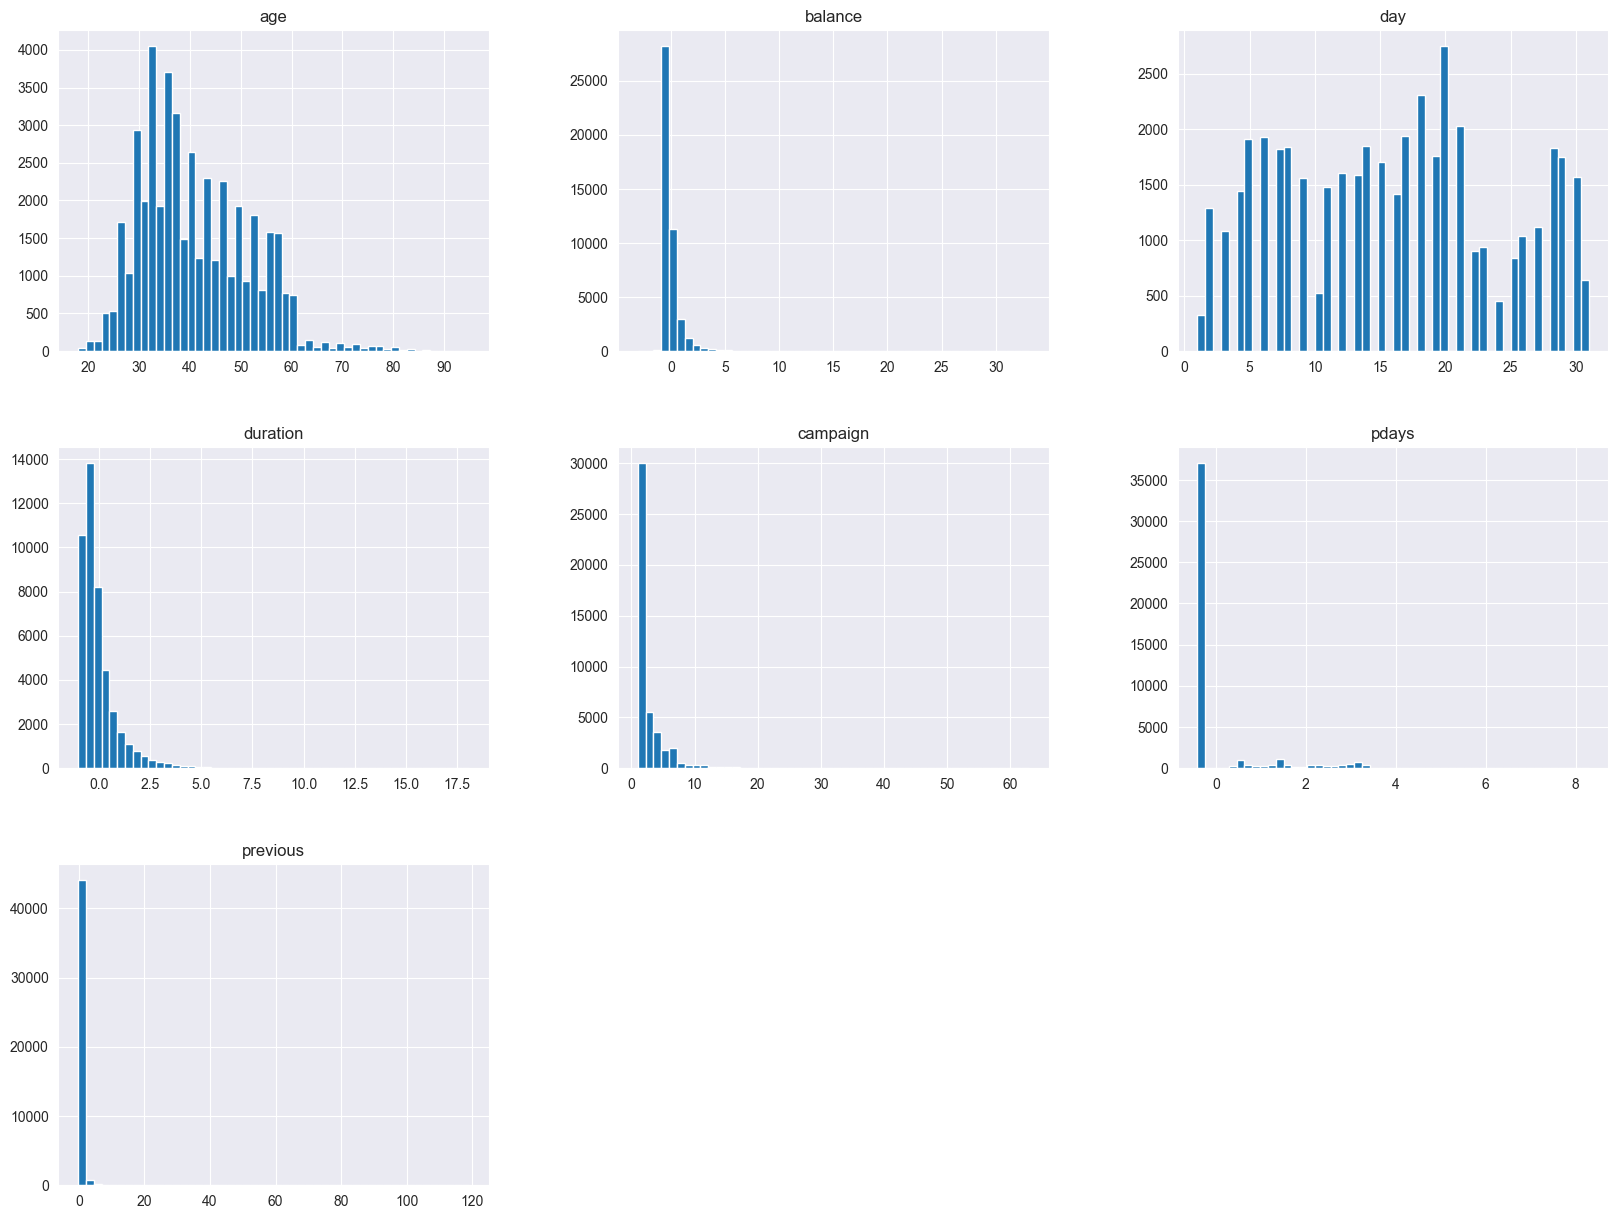

In [49]:
# Plot histograms after normalization
bank.hist(bins=50, figsize=(20,15))

###  Remove Outliers Using IQR Method

The Interquartile Range (IQR) method removes data points that fall below Q1 - 1.5*IQR or above Q3 + 1.5*IQR.
This helps reduce the influence of extreme values on the model.

In [50]:
# Remove outliers using the IQR (Interquartile Range) method
# For each numerical column, remove rows where values fall outside [Q1-1.5*IQR, Q3+1.5*IQR]
numerical_cols = bank.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    Q1 = bank[col].quantile(0.25)
    Q3 = bank[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    bank = bank[(bank[col] >= lower_bound) & (bank[col] <= upper_bound)]

# Display the new shape after outlier removal
print(f"Shape of the DataFrame after removing outliers: {bank.shape}")

Shape of the DataFrame after removing outliers: (28069, 17)


In [51]:
# Verify the data structure after outlier removal
bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28069 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        28069 non-null  int64  
 1   job        28069 non-null  object 
 2   marital    28069 non-null  object 
 3   education  28069 non-null  object 
 4   default    28069 non-null  object 
 5   balance    28069 non-null  float64
 6   housing    28069 non-null  object 
 7   loan       28069 non-null  object 
 8   contact    28069 non-null  object 
 9   day        28069 non-null  int64  
 10  month      28069 non-null  object 
 11  duration   28069 non-null  float64
 12  campaign   28069 non-null  int64  
 13  pdays      28069 non-null  float64
 14  previous   28069 non-null  float64
 15  poutcome   28069 non-null  object 
 16  y          28069 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 3.9+ MB


###  Data Distribution After Removing Outliers

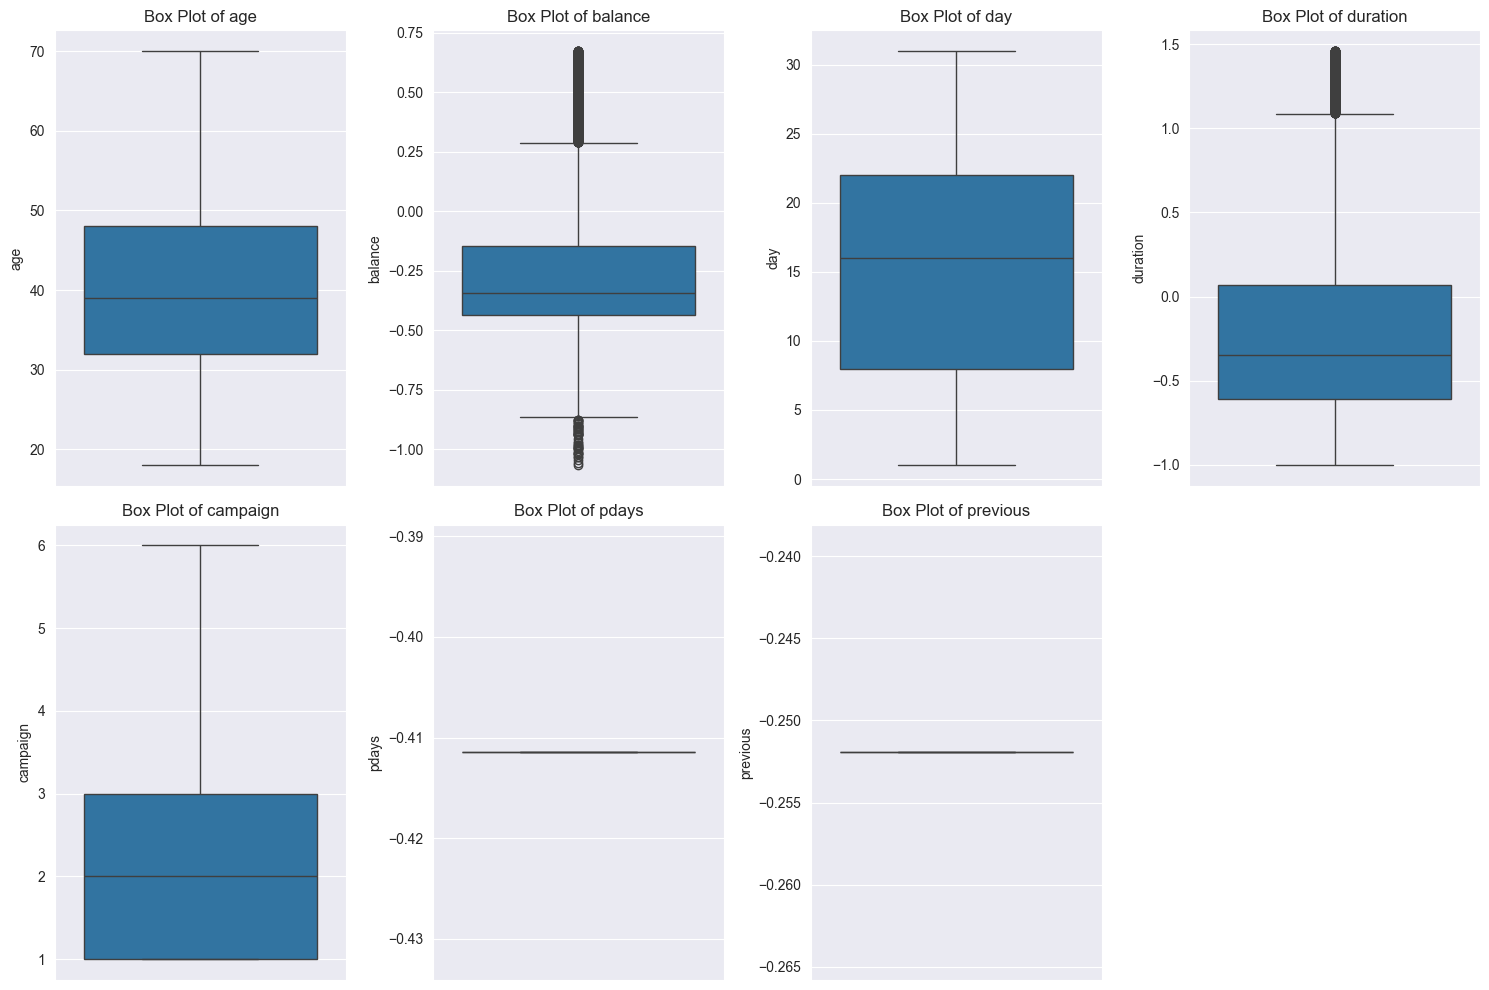

In [52]:
# Visualize box plots after outlier removal
# Outliers should be significantly reduced compared to before
numerical_cols = bank.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=bank[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

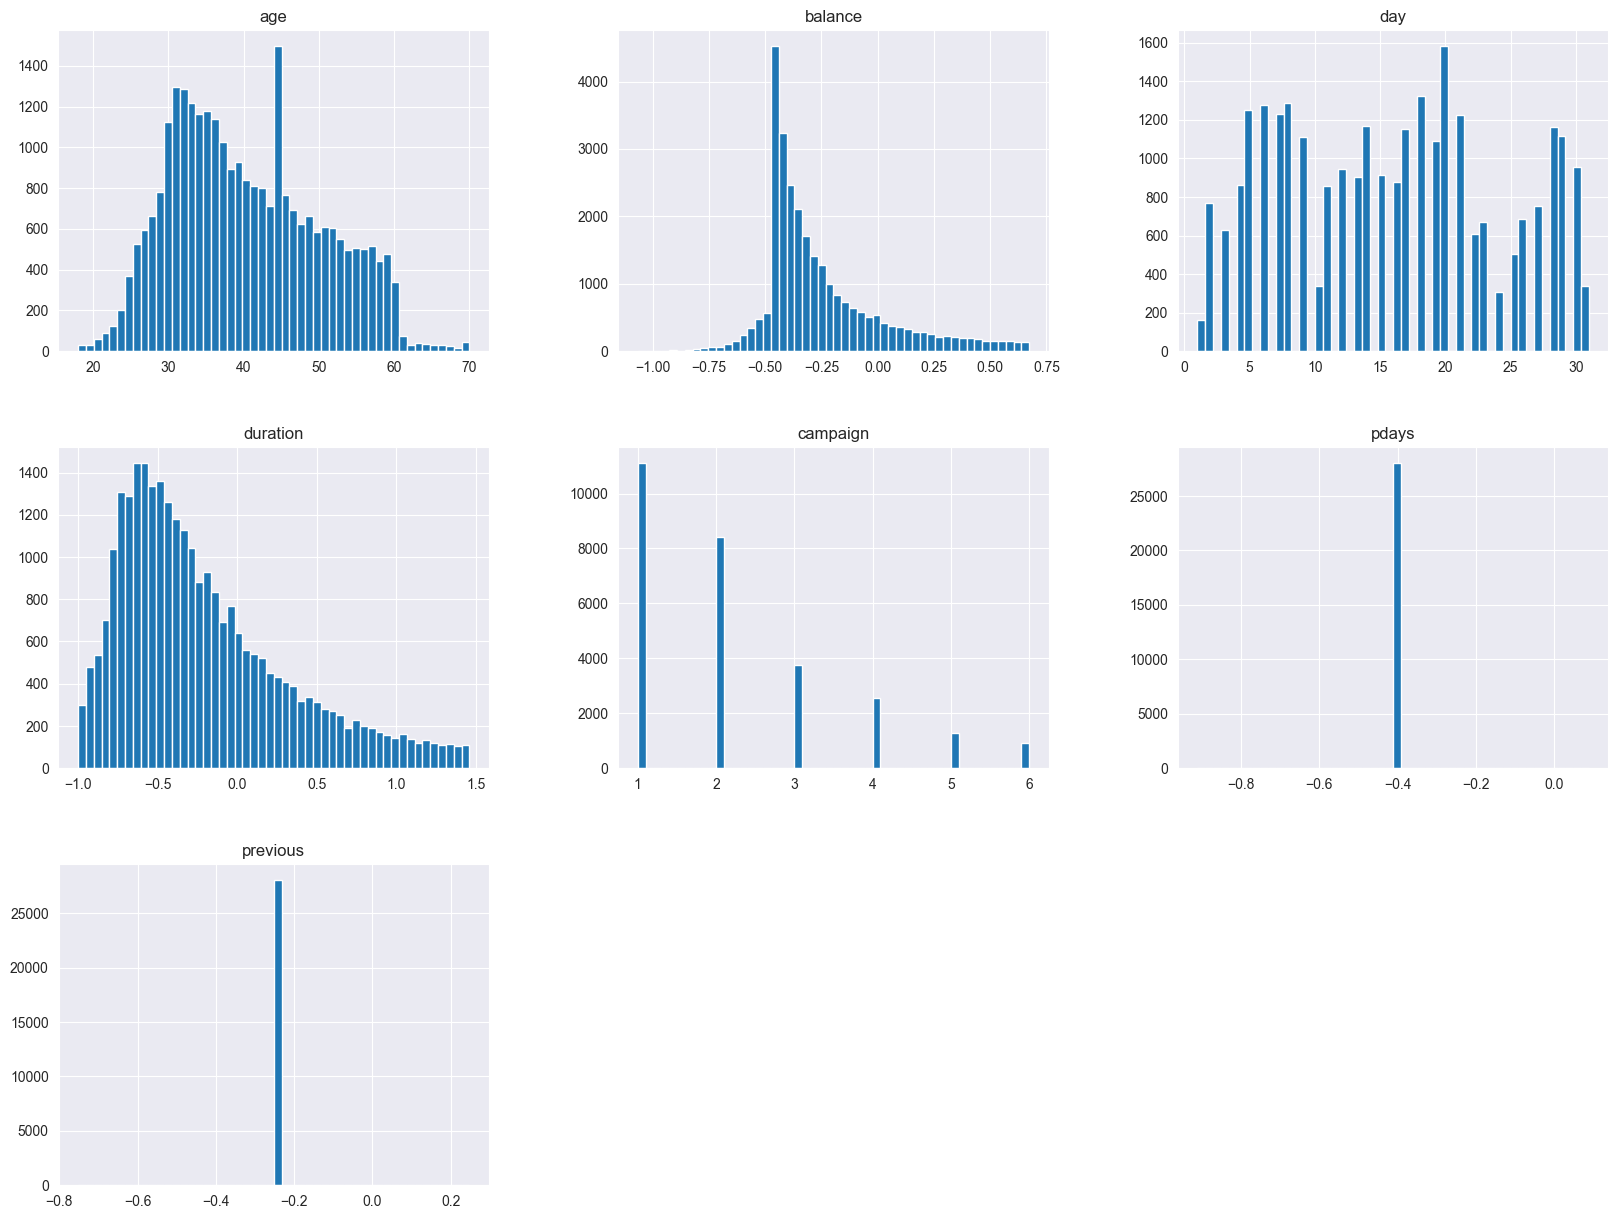

In [53]:
# Plot histograms after outlier removal
bank.hist(bins=50, figsize=(20,15))

### Encode Categorical Variables

Machine learning algorithms require numerical input. We use:
- **One-Hot Encoding**: For nominal categorical variables with multiple categories (job, marital, education, contact, poutcome)
- **Label Encoding**: For binary categorical variables (default, housing, loan, month, y)

In [54]:
# Apply One-Hot Encoding to multi-category nominal variables
# drop_first=True avoids multicollinearity by dropping one category per feature
one_hot_cols = ['job', 'marital', 'education', 'contact', 'poutcome']
bank = pd.get_dummies(bank, columns=one_hot_cols, drop_first=True)

# Apply Label Encoding to binary categorical variables and the target
# LabelEncoder converts categorical labels to integers (0, 1, 2, ...)
label_encode_cols = ['default', 'housing', 'loan', 'month', 'y']
for col in label_encode_cols:
    le = LabelEncoder()
    bank[col] = le.fit_transform(bank[col])

# Display the encoded DataFrame
print("DataFrame after encoding categorical variables:")
display(bank.head())

DataFrame after encoding categorical variables:


,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown
0,58,0,0.256419,1,0,5,8,0.011016,1,-0.411453,...,False,False,False,True,False,False,True,False,False,True
1,44,0,-0.437895,1,0,5,8,-0.416127,1,-0.411453,...,True,False,False,False,True,True,False,False,False,True
2,33,0,-0.446762,1,1,5,8,-0.707361,1,-0.411453,...,False,False,False,True,False,True,False,False,False,True
3,47,0,0.047205,1,0,5,8,-0.645231,1,-0.411453,...,False,False,False,True,False,False,False,True,False,True
4,33,0,-0.447091,0,0,5,8,-0.233620,1,-0.411453,...,False,False,True,False,True,False,False,True,False,True


In [55]:
# Verify the data structure after encoding
bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28069 entries, 0 to 45209
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  28069 non-null  int64  
 1   default              28069 non-null  int64  
 2   balance              28069 non-null  float64
 3   housing              28069 non-null  int64  
 4   loan                 28069 non-null  int64  
 5   day                  28069 non-null  int64  
 6   month                28069 non-null  int64  
 7   duration             28069 non-null  float64
 8   campaign             28069 non-null  int64  
 9   pdays                28069 non-null  float64
 10  previous             28069 non-null  float64
 11  y                    28069 non-null  int64  
 12  job_blue-collar      28069 non-null  bool   
 13  job_entrepreneur     28069 non-null  bool   
 14  job_housemaid        28069 non-null  bool   
 15  job_management       28069 non-null  bool

In [56]:
# Convert boolean columns (from one-hot encoding) to integers (0/1)
# This ensures all features are in numeric format for ML algorithms
for col in bank.columns:
  if bank[col].dtype == 'bool':
    bank[col] = bank[col].astype(int)

# Verify all columns are now numeric
bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28069 entries, 0 to 45209
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  28069 non-null  int64  
 1   default              28069 non-null  int64  
 2   balance              28069 non-null  float64
 3   housing              28069 non-null  int64  
 4   loan                 28069 non-null  int64  
 5   day                  28069 non-null  int64  
 6   month                28069 non-null  int64  
 7   duration             28069 non-null  float64
 8   campaign             28069 non-null  int64  
 9   pdays                28069 non-null  float64
 10  previous             28069 non-null  float64
 11  y                    28069 non-null  int64  
 12  job_blue-collar      28069 non-null  int64  
 13  job_entrepreneur     28069 non-null  int64  
 14  job_housemaid        28069 non-null  int64  
 15  job_management       28069 non-null  int6

In [57]:
# Save the cleaned dataset to Google Drive for future use
bank.to_csv('bank_cleaned.csv', index=False)

---
## 5. Handle Class Imbalance

The target variable 'y' is highly imbalanced (majority class: 'no', minority class: 'yes').
We use **Random Undersampling** to balance the classes by reducing the majority class to match the minority class size.

**Why Undersampling?**
- Simple and effective for this dataset
- Prevents model bias towards the majority class
- Reduces computational cost by using a smaller dataset

In [58]:
# Check the class distribution after preprocessing
# Shows significant imbalance: majority class (0) >> minority class (1)
bank['y'].value_counts()

y
0    26504
1     1565
Name: count, dtype: int64

In [59]:
# Apply Random Undersampling to balance the dataset
# Strategy: Keep all minority class (y=1) samples, randomly sample equal number from majority class (y=0)
# random_state=42 ensures reproducibility

# Get all minority class samples (y=1)
bank_balanced = bank[bank['y'] == 1].sample(n=1565, random_state=42)

# Randomly sample the same number from majority class (y=0)
bank_balanced = pd.concat([bank_balanced, bank[bank['y'] == 0].sample(n=1565, random_state=42)])

# Verify the balanced distribution
bank_balanced['y'].value_counts()

y
1    1565
0    1565
Name: count, dtype: int64

In [60]:
# Save the balanced dataset to Google Drive for model training
bank_balanced.to_csv('bank_balanced.csv', index=False)


## Recursive Feature Elimination (RFE)

we applied Recursive Feature Elimination with Cross-Validation (RFECV) to identify the most important features for predicting term deposit subscription.

RFECV automatically determines the optimal number of features by:
- Recursively removing the least important features
- Using 5-fold cross-validation to evaluate performance at each step
- Selecting the feature subset that maximizes model accuracy

### Import ML Libraries

In [61]:
# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, roc_curve, 
                             confusion_matrix, classification_report)
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Load Data and Split into Train/Validation/Test Sets

In [62]:
# Load the balanced dataset
bank_data = pd.read_csv('bank_balanced.csv')

# Separate features and target
X = bank_data.drop('y', axis=1)
y = bank_data['y']

# First split: 60% train, 40% temp (for validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# Second split: Split temp into 50% validation, 50% test (20% each of total)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"Dataset split completed:")
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nNumber of features: {X_train.shape[1]}")
print(f"\nClass distribution in training set:")
print(y_train.value_counts())

Dataset split completed:
Training set: 1878 samples (60.0%)
Validation set: 626 samples (20.0%)
Test set: 626 samples (20.0%)

Number of features: 29

Class distribution in training set:
y
0    939
1    939
Name: count, dtype: int64


###  Apply RFECV for Feature Selection

In [63]:
# Initialize Logistic Regression as the estimator for RFECV
lr_estimator = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)

# Apply RFECV with 5-fold cross-validation
print("Running RFECV")
rfecv = RFECV(
    estimator=lr_estimator,
    step=1,
    cv=5,
    scoring='accuracy',
    min_features_to_select=5,
    n_jobs=-1
)

# Fit RFECV on training data
rfecv.fit(X_train, y_train)

# Get optimal number of features
optimal_features = rfecv.n_features_
print(f"\nOptimal number of features: {optimal_features}")
print(f"Features selected: {optimal_features}/{X_train.shape[1]}")

# Get selected feature names
selected_features = X_train.columns[rfecv.support_].tolist()
print(f"\nSelected features:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")

Running RFECV

Optimal number of features: 17
Features selected: 17/29

Selected features:
1. balance
2. housing
3. loan
4. duration
5. pdays
6. previous
7. job_blue-collar
8. job_entrepreneur
9. job_housemaid
10. job_retired
11. job_self-employed
12. job_services
13. job_student
14. job_technician
15. marital_married
16. education_tertiary
17. contact_unknown


###  Visualize RFECV Results

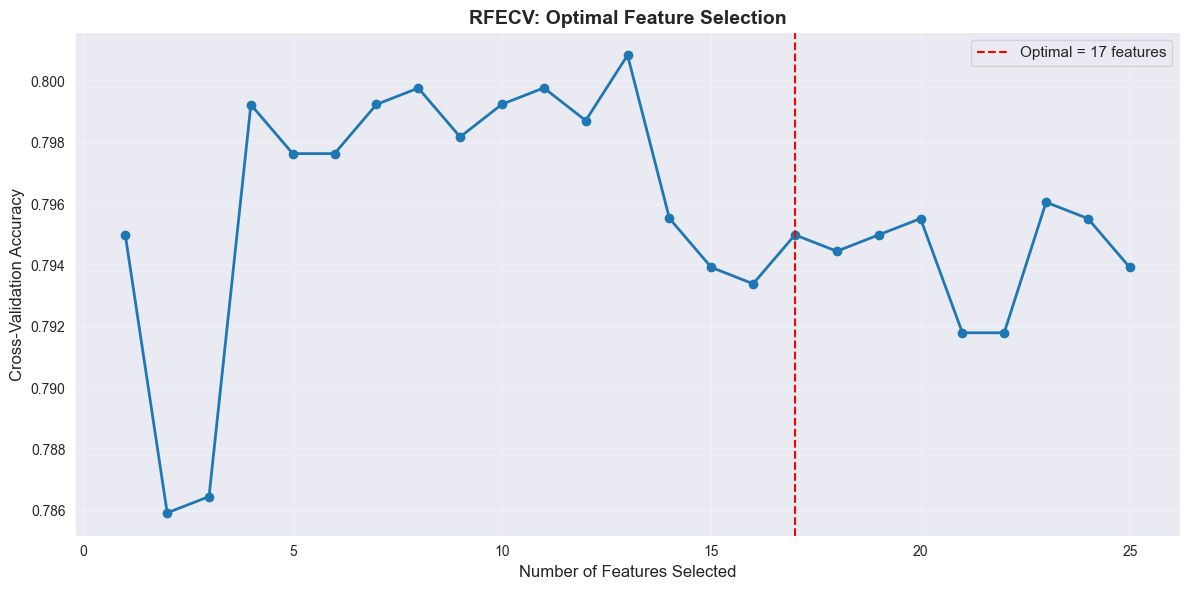

Maximum CV accuracy: 0.8009


In [64]:
# Plot the cross-validation scores vs. number of features
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), 
         rfecv.cv_results_['mean_test_score'], 
         marker='o', linewidth=2, markersize=6)
plt.xlabel('Number of Features Selected', fontsize=12)
plt.ylabel('Cross-Validation Accuracy', fontsize=12)
plt.title('RFECV: Optimal Feature Selection', fontsize=14, fontweight='bold')
plt.axvline(x=optimal_features, color='r', linestyle='--', 
            label=f'Optimal = {optimal_features} features')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print(f"Maximum CV accuracy: {rfecv.cv_results_['mean_test_score'].max():.4f}")

## Model Training and Evaluation

we trained and evaluated three classification models:
1. **Logistic Regression**
2. **Random Forest**
3. **Support Vector Machine (SVM)**

Each model is trained in two configurations:
- **Baseline**: Using all 29 features
- **RFE-Optimized**: Using only the features selected by RFECV

### Prepare Feature Sets

In [65]:
# Create datasets with selected features only
X_train_rfe = X_train[selected_features]
X_val_rfe = X_val[selected_features]
X_test_rfe = X_test[selected_features]

print(f"Baseline feature set: {X_train.shape[1]} features")
print(f"RFE-optimized feature set: {X_train_rfe.shape[1]} features")
print(f"Feature reduction: {X_train.shape[1] - X_train_rfe.shape[1]} features removed")

Baseline feature set: 29 features
RFE-optimized feature set: 17 features
Feature reduction: 12 features removed


###  Apply SelectKBest with Classif for Feature Selection

In [77]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
import numpy as np

print("Running SelectKBest with f_classif")

# Test different k values to find optimal
k_range = range(5, X_train.shape[1] + 1, 5)  # Test every 5 features
scores = []

lr_estimator = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)

for k in k_range:
  selector = SelectKBest(score_func=f_classif, k=k)
  X_train_temp = selector.fit_transform(X_train, y_train)

  # Cross-validate
  cv_score = cross_val_score(lr_estimator, X_train_temp, y_train,
                             cv=5, scoring='accuracy', n_jobs=-1).mean()
  scores.append(cv_score)
  print(f"k={k}: CV accuracy={cv_score:.4f}")

# Find optimal k
optimal_k = k_range[np.argmax(scores)]
print(f"\nOptimal number of features: {optimal_k}")

# Apply SelectKBest with optimal k
k_best = SelectKBest(score_func=f_classif, k=optimal_k)
k_best.fit(X_train, y_train)

# Transform the data
X_train_selected = k_best.transform(X_train)
X_test_selected = k_best.transform(X_test)

# Get selected feature names
selected_features = X_train.columns[k_best.get_support()].tolist()
print(f"\nSelected features: {len(selected_features)}/{X_train.shape[1]}")
print(f"\nSelected features:")
for i, feature in enumerate(selected_features, 1):
  print(f"{i}. {feature}")

# Get feature scores
feature_scores = pd.DataFrame({
  'Feature': X_train.columns,
  'Score': k_best.scores_
}).sort_values('Score', ascending=False)

print(f"\nTop 10 features by score:")
print(feature_scores.head(10))

# Plot the cross-validation scores vs. number of features

Running SelectKBest with f_classif
k=5: CV accuracy=0.7913
k=10: CV accuracy=0.7961
k=15: CV accuracy=0.7934
k=20: CV accuracy=0.7929
k=25: CV accuracy=0.7945

Optimal number of features: 10

Selected features: 10/29

Selected features:
1. housing
2. loan
3. duration
4. campaign
5. job_blue-collar
6. job_student
7. marital_married
8. marital_single
9. education_tertiary
10. contact_unknown

Top 10 features by score:
               Feature       Score
7             duration  560.440276
28     contact_unknown  240.830570
3              housing  159.448395
25  education_tertiary   62.595466
22     marital_married   48.801639
23      marital_single   42.054035
4                 loan   41.265087
11     job_blue-collar   38.226372
8             campaign   33.852999
18         job_student   33.333397


###  Visualize SelectKBest with Classif Results

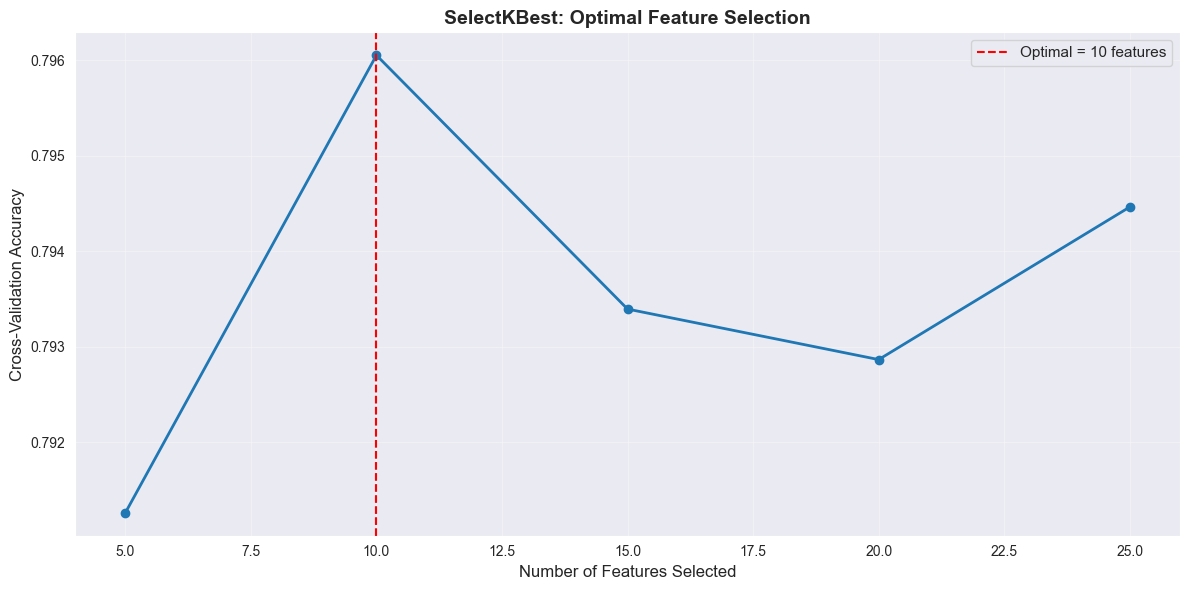

Maximum CV accuracy: 0.7961


In [78]:
plt.figure(figsize=(12, 6))
plt.plot(k_range, scores, marker='o', linewidth=2, markersize=6)
plt.xlabel('Number of Features Selected', fontsize=12)
plt.ylabel('Cross-Validation Accuracy', fontsize=12)
plt.title('SelectKBest: Optimal Feature Selection', fontsize=14, fontweight='bold')
plt.axvline(x=optimal_k, color='r', linestyle='--',
          label=f'Optimal = {optimal_k} features')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print(f"Maximum CV accuracy: {max(scores):.4f}")

### Define Evaluation Function

In [67]:
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, model_name):
    """
    Train a model and evaluate it on validation and test sets.
    Returns a dictionary with all performance metrics.
    """
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    
    # Get probability predictions for ROC-AUC (if available)
    if hasattr(model, 'predict_proba'):
        y_val_proba = model.predict_proba(X_val)[:, 1]
        y_test_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_val_proba = model.decision_function(X_val)
        y_test_proba = model.decision_function(X_test)
    
    # Calculate metrics for validation set
    val_metrics = {
        'accuracy': accuracy_score(y_val, y_val_pred),
        'precision': precision_score(y_val, y_val_pred),
        'recall': recall_score(y_val, y_val_pred),
        'f1': f1_score(y_val, y_val_pred),
        'roc_auc': roc_auc_score(y_val, y_val_proba)
    }
    
    # Calculate metrics for test set
    test_metrics = {
        'accuracy': accuracy_score(y_test, y_test_pred),
        'precision': precision_score(y_test, y_test_pred),
        'recall': recall_score(y_test, y_test_pred),
        'f1': f1_score(y_test, y_test_pred),
        'roc_auc': roc_auc_score(y_test, y_test_proba)
    }
    
    return {
        'model': model,
        'model_name': model_name,
        'val_metrics': val_metrics,
        'test_metrics': test_metrics,
        'y_val_pred': y_val_pred,
        'y_test_pred': y_test_pred,
        'y_val_proba': y_val_proba,
        'y_test_proba': y_test_proba
    }

### Train Baseline Models (All Features)

In [68]:
print("Training baseline models with all 29 features...\n")

# Initialize baseline models
models_baseline = {
    'Logistic Regression': LogisticRegression(solver='liblinear', max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, probability=True)
}

# Train and evaluate baseline models
results_baseline = {}
for name, model in models_baseline.items():
    print(f"Training {name} (Baseline)...")
    results_baseline[name] = evaluate_model(
        model, X_train, y_train, X_val, y_val, X_test, y_test, f"{name} (Baseline)"
    )
    print(f"  Validation Accuracy: {results_baseline[name]['val_metrics']['accuracy']:.4f}")
    print(f"  Test Accuracy: {results_baseline[name]['test_metrics']['accuracy']:.4f}\n")

print("Baseline models training completed!")

Training baseline models with all 29 features...

Training Logistic Regression (Baseline)...
  Validation Accuracy: 0.7748
  Test Accuracy: 0.7604

Training Random Forest (Baseline)...
  Validation Accuracy: 0.8115
  Test Accuracy: 0.8115

Training SVM (Baseline)...
  Validation Accuracy: 0.7125
  Test Accuracy: 0.6869

Baseline models training completed!


### Train RFE-Optimized Models (Selected Features)

In [69]:
print(f"Training RFE-optimized models with {optimal_features} selected features...\n")

# Initialize RFE-optimized models
models_rfe = {
    'Logistic Regression': LogisticRegression(solver='liblinear', max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, probability=True)
}

# Train and evaluate RFE-optimized models
results_rfe = {}
for name, model in models_rfe.items():
    print(f"Training {name} (RFE)...")
    results_rfe[name] = evaluate_model(
        model, X_train_rfe, y_train, X_val_rfe, y_val, X_test_rfe, y_test, f"{name} (RFE)"
    )
    print(f"  Validation Accuracy: {results_rfe[name]['val_metrics']['accuracy']:.4f}")
    print(f"  Test Accuracy: {results_rfe[name]['test_metrics']['accuracy']:.4f}\n")


Training RFE-optimized models with 17 selected features...

Training Logistic Regression (RFE)...
  Validation Accuracy: 0.7460
  Test Accuracy: 0.7620

Training Random Forest (RFE)...
  Validation Accuracy: 0.7540
  Test Accuracy: 0.7380

Training SVM (RFE)...
  Validation Accuracy: 0.7700
  Test Accuracy: 0.7412



### Train SKB-Optimized Models (Selected Features)

In [71]:
print(f"Training SelectKBest-optimized models with {optimal_features_b_best} selected features...\n")

# Transform train, validation, and test sets
X_train_selected = k_best.transform(X_train)
X_val_selected = k_best.transform(X_val)
X_test_selected = k_best.transform(X_test)

# Initialize SelectKBest-optimized models
models_kbest = {
  'Logistic Regression': LogisticRegression(solver='liblinear', max_iter=1000, random_state=42),
  'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
  'SVM': SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, probability=True)
}

# Train and evaluate SelectKBest-optimized models
results_kbest = {}
for name, model in models_kbest.items():
  print(f"Training {name} (SelectKBest)...")
  results_kbest[name] = evaluate_model(
      model, X_train_selected, y_train, X_val_selected, y_val, X_test_selected, y_test, f"{name} (SelectKBest)"
  )
  print(f"  Validation Accuracy: {results_kbest[name]['val_metrics']['accuracy']:.4f}")
  print(f"  Test Accuracy: {results_kbest[name]['test_metrics']['accuracy']:.4f}\n")

Training SelectKBest-optimized models with ['housing', 'loan', 'duration', 'campaign', 'job_blue-collar', 'job_student', 'marital_married', 'marital_single', 'education_tertiary', 'contact_unknown'] selected features...

Training Logistic Regression (SelectKBest)...
  Validation Accuracy: 0.7604
  Test Accuracy: 0.7684

Training Random Forest (SelectKBest)...
  Validation Accuracy: 0.7556
  Test Accuracy: 0.7188

Training SVM (SelectKBest)...
  Validation Accuracy: 0.7652
  Test Accuracy: 0.7748




## Results Comparison 

we compare the performance of all six models across multiple evaluation metrics.

### Performance Comparison Table

In [34]:
# Combine all results
all_results = {}
for name, result in results_baseline.items():
    all_results[f"{name} (Baseline)"] = result
for name, result in results_rfe.items():
    all_results[f"{name} (RFE)"] = result

# Create comparison dataframe for validation set
val_comparison = pd.DataFrame({
    'Model': list(all_results.keys()),
    'Accuracy': [all_results[name]['val_metrics']['accuracy'] for name in all_results.keys()],
    'Precision': [all_results[name]['val_metrics']['precision'] for name in all_results.keys()],
    'Recall': [all_results[name]['val_metrics']['recall'] for name in all_results.keys()],
    'F1-Score': [all_results[name]['val_metrics']['f1'] for name in all_results.keys()],
    'ROC-AUC': [all_results[name]['val_metrics']['roc_auc'] for name in all_results.keys()]
})

# Create comparison dataframe for test set
test_comparison = pd.DataFrame({
    'Model': list(all_results.keys()),
    'Accuracy': [all_results[name]['test_metrics']['accuracy'] for name in all_results.keys()],
    'Precision': [all_results[name]['test_metrics']['precision'] for name in all_results.keys()],
    'Recall': [all_results[name]['test_metrics']['recall'] for name in all_results.keys()],
    'F1-Score': [all_results[name]['test_metrics']['f1'] for name in all_results.keys()],
    'ROC-AUC': [all_results[name]['test_metrics']['roc_auc'] for name in all_results.keys()]
})


print("VALIDATION SET PERFORMANCE")
display(val_comparison.style.format({
    'Accuracy': '{:.4f}', 'Precision': '{:.4f}', 
    'Recall': '{:.4f}', 'F1-Score': '{:.4f}', 'ROC-AUC': '{:.4f}'
}))


print("TEST SET PERFORMANCE")
display(test_comparison.style.format({
    'Accuracy': '{:.4f}', 'Precision': '{:.4f}', 
    'Recall': '{:.4f}', 'F1-Score': '{:.4f}', 'ROC-AUC': '{:.4f}'
}))
       

VALIDATION SET PERFORMANCE


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression (Baseline),0.7748,0.7739,0.7764,0.7751,0.8541
1,Random Forest (Baseline),0.8115,0.8000,0.8307,0.8150,0.8895
2,SVM (Baseline),0.7125,0.7401,0.6550,0.6949,0.7838
3,Logistic Regression (RFE),0.7460,0.7468,0.7444,0.7456,0.8401
4,Random Forest (RFE),0.7540,0.7446,0.7732,0.7586,0.8201
5,SVM (RFE),0.7700,0.7568,0.7955,0.7757,0.8466


TEST SET PERFORMANCE


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression (Baseline),0.7604,0.7349,0.8147,0.7727,0.8429
1,Random Forest (Baseline),0.8115,0.7826,0.8626,0.8207,0.8819
2,SVM (Baseline),0.6869,0.6997,0.6550,0.6766,0.7540
3,Logistic Regression (RFE),0.7620,0.7440,0.7987,0.7704,0.8296
4,Random Forest (RFE),0.7380,0.7251,0.7668,0.7453,0.8079
5,SVM (RFE),0.7412,0.7151,0.8019,0.7560,0.8234


### Summary 

In [35]:
# Find the best performing model based on test set F1-score
best_model_idx = test_comparison['F1-Score'].idxmax()
best_model_name = test_comparison.loc[best_model_idx, 'Model']
best_f1 = test_comparison.loc[best_model_idx, 'F1-Score']
best_accuracy = test_comparison.loc[best_model_idx, 'Accuracy']
best_roc_auc = test_comparison.loc[best_model_idx, 'ROC-AUC']

print("=" * 80)
print("FINAL SUMMARY AND RECOMMENDATIONS")
print("=" * 80)
print(f"\nBest Performing Model: {best_model_name}")
print(f"  - F1-Score: {best_f1:.4f}")
print(f"  - Accuracy: {best_accuracy:.4f}")
print(f"  - ROC-AUC: {best_roc_auc:.4f}")

print(f"\n\nFeature Selection Impact:")
print(f"  - Original features: 29")
print(f"  - Selected features: {optimal_features}")
print(f"  - Features removed: {29 - optimal_features} ({(29 - optimal_features)/29*100:.1f}% reduction)")

print(f"\n\nKey Insights:")
print(f" RFECV identified {optimal_features} most important features for prediction")
print(f" Feature reduction from 29 to {optimal_features} features")

# Compare baseline vs RFE for each model
print(f"\n Performance Impact of RFE:")
for model_type in ['Logistic Regression', 'Random Forest', 'SVM']:
    baseline_f1 = test_comparison[test_comparison['Model'] == f'{model_type} (Baseline)']['F1-Score'].values[0]
    rfe_f1 = test_comparison[test_comparison['Model'] == f'{model_type} (RFE)']['F1-Score'].values[0]
    improvement = ((rfe_f1 - baseline_f1) / baseline_f1) * 100
    symbol = "+" if improvement > 0 else "-"
    print(f"   - {model_type}: {baseline_f1:.4f} → {rfe_f1:.4f} ({symbol} {abs(improvement):.2f}%)")

print(f"\n\nSelected Features ({optimal_features} total):")
for i, feature in enumerate(selected_features, 1):
    print(f"  {i}. {feature}")

FINAL SUMMARY AND RECOMMENDATIONS

Best Performing Model: Random Forest (Baseline)
  - F1-Score: 0.8207
  - Accuracy: 0.8115
  - ROC-AUC: 0.8819


Feature Selection Impact:
  - Original features: 29
  - Selected features: 17
  - Features removed: 12 (41.4% reduction)


Key Insights:
 RFECV identified 17 most important features for prediction
 Feature reduction from 29 to 17 features

 Performance Impact of RFE:
   - Logistic Regression: 0.7727 → 0.7704 (- 0.30%)
   - Random Forest: 0.8207 → 0.7453 (- 9.18%)
   - SVM: 0.6766 → 0.7560 (+ 11.74%)


Selected Features (17 total):
  1. housing
  2. loan
  3. duration
  4. campaign
  5. job_blue-collar
  6. job_student
  7. marital_married
  8. marital_single
  9. education_tertiary
  10. contact_unknown
